In [1]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from sklearn.model_selection import learning_curve, ShuffleSplit
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load saved model
def load_model(model_path='xgboost_hate_speech_model.pkl'):
    """
    Load the saved model
    """
    print(f"Loading model from {model_path}...")
    with open(model_path, 'rb') as f:
        model = pickle.load(f)
    return model

In [5]:
# Load dataset
def load_data(file_path='csv_files/combined_features_embeddings_only.csv'):
    """
    Load the features dataset
    """
    df = pd.read_csv(file_path)
    print(f"Dataset loaded with shape: {df.shape}")

    # Separate features and target
    X = df.drop('class', axis=1)
    y = df['class']

    return X, y

In [13]:
# Generate learning curve
def plot_learning_curve(model, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 10)):
    """
    Generate a learning curve plot to show how model performance improves with more data
    """
    plt.figure(figsize=(10, 6))
    plt.title("Learning Curve", fontsize=16)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples", fontsize=14)
    plt.ylabel("Accuracy", fontsize=14)

    if cv is None:
        cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    plt.grid(linestyle='--', alpha=0.7)
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2, color="g")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    # Optional: Plot training score
    # plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
    #                  train_scores_mean + train_scores_std, alpha=0.1, color="r")
    # plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
    #          label="Training score")

    plt.legend(loc="best", fontsize=12)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.savefig('learning_curve.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Print results
    print("\nLearning Curve Analysis:")
    print("-" * 40)
    print(f"{'Train Size':<15}{'Train Score':<15}{'Test Score':<15}")
    print("-" * 40)
    for i, size in enumerate(train_sizes):
        print(f"{size:<15.0f}{train_scores_mean[i]:<15.3f}{test_scores_mean[i]:<15.3f}")

    # Check for high bias or high variance
    final_train_score = train_scores_mean[-1]
    final_test_score = test_scores_mean[-1]
    gap = final_train_score - final_test_score

    print("\nModel Diagnosis:")
    print("-" * 40)
    if final_test_score < 0.75:  # Adjust based on your expectations
        print("The model shows HIGH BIAS (underfitting)")
        print("Suggestions:")
        print("- Increase model complexity")
        print("- Add more features or feature engineering")
        print("- Reduce regularization")

    if gap > 0.1:  # Adjust based on your expectations
        print("The model shows HIGH VARIANCE (overfitting)")
        print("Suggestions:")
        print("- Add more training data")
        print("- Use stronger regularization")
        print("- Reduce model complexity")
        print("- Try feature selection")

    if final_test_score >= 0.75 and gap <= 0.1:
        print("The model seems well balanced")
        print("Further improvements could come from:")
        print("- Ensemble methods")
        print("- Hyperparameter tuning")
        print("- Additional feature engineering")

    return train_sizes, train_scores_mean, test_scores_mean

In [15]:
# Main function
def main():
    # Load the saved model
    model = load_model()

    # Load the data
    X, y = load_data()

    # Generate the learning curve
    plot_learning_curve(model, X, y, ylim=(0.6, 0.9))

    print("\nLearning curve analysis completed!")

    print("\nAnalysis completed!")



Loading model from xgboost_hate_speech_model.pkl...
Dataset loaded with shape: (24783, 1025)


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:53:18] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:53:19] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:53:19] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning

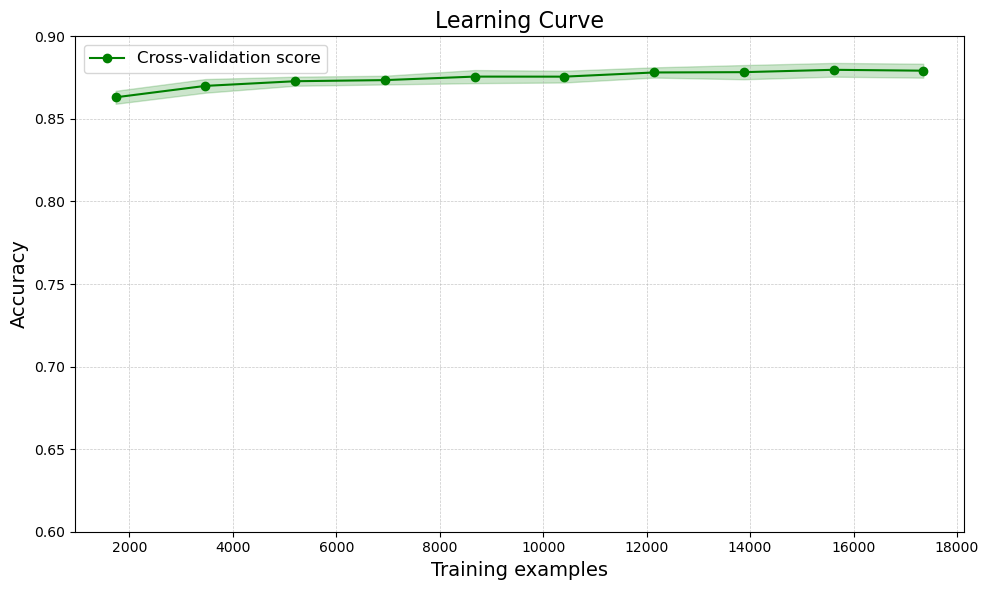


Learning Curve Analysis:
----------------------------------------
Train Size     Train Score    Test Score     
----------------------------------------
1734           0.999          0.863          
3469           0.999          0.870          
5204           0.999          0.873          
6939           0.999          0.873          
8674           0.998          0.876          
10408          0.996          0.876          
12143          0.993          0.878          
13878          0.989          0.878          
15613          0.985          0.880          
17348          0.982          0.879          

Model Diagnosis:
----------------------------------------
The model shows HIGH VARIANCE (overfitting)
Suggestions:
- Add more training data
- Use stronger regularization
- Reduce model complexity
- Try feature selection

Learning curve analysis completed!

Analysis completed!


In [17]:
if __name__ == "__main__":
    main()